# Conceive an app for the Public Health Agency

In [2]:
#! usr/bin/env python 3
# coding: utf-8

# Importing librairies

import numpy as np                     # linear algebra
import pandas as pd                    # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sp                     # numerical integration, interpolation, optimization, linear algebra, and statistics
import scipy.stats as stats
import seaborn as sns                  # statistical data visualization
import matplotlib.pyplot as plt        # static, animated, and interactive visualizations in Python
import statsmodels.formula.api as smf  # statistical models fit
import statsmodels.api as sm           # provides classes and functions to estimate many different statistical models


In [3]:
df_data_cleaned = pd.read_csv(r"D:\Formation Data Scientist\P3_Lanchec_Stephane\cleaning1.csv", low_memory=False)
df_data_cleaned

,Unnamed: 0,code,url,product_name,quantity,ingredients_text,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,...,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,Countries
0,5,0000000000100,http://world-en.openfoodfacts.org/product/0000...,moutarde au moût de raisin,100g,eau graines de téguments de moutarde vinaigre ...,0.0,0.0,0.0,18.0,...,936.0,8.2,2.2,29.0,22.0,0.0,5.1,4.60,1.840,France
1,16,0000000000949,http://world-en.openfoodfacts.org/product/0000...,Salade de carottes râpées,NaN,NaN,NaN,NaN,NaN,1.0,...,134.0,0.3,0.1,5.3,3.9,NaN,0.9,0.42,0.168,France
2,25,0000000001281,http://world-en.openfoodfacts.org/product/0000...,Tarte noix de coco,NaN,NaN,NaN,NaN,NaN,14.0,...,1594.0,22.0,15.5,27.3,21.9,4.4,4.6,0.10,0.040,France
3,35,0000000001885,http://world-en.openfoodfacts.org/product/0000...,Compote de poire,NaN,NaN,NaN,NaN,NaN,-2.0,...,657.0,0.0,0.0,36.0,27.0,3.6,0.6,0.00,0.000,France
4,39,0000000002257,http://world-en.openfoodfacts.org/product/0000...,Salade de macedoine de légumes,NaN,NaN,NaN,NaN,NaN,1.0,...,598.0,12.7,1.0,3.9,1.0,NaN,1.9,0.27,0.108,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290706,1851722,9999991042711,http://world-en.openfoodfacts.org/product/9999...,Riz au lait,NaN,NaN,NaN,NaN,NaN,7.0,...,628.0,6.1,4.3,21.0,14.0,NaN,2.9,0.08,0.032,France
290707,1851724,9999991042742,http://world-en.openfoodfacts.org/product/9999...,Mousse au chocolat noir,85 g,NaN,NaN,NaN,NaN,17.0,...,1448.0,27.0,17.0,19.0,18.0,NaN,6.0,0.19,0.076,France
290708,1851726,9999991149090,http://world-en.openfoodfacts.org/product/9999...,Riz parfumé,NaN,NaN,NaN,NaN,NaN,0.0,...,1469.0,0.5,0.0,80.0,0.0,NaN,7.0,0.00,0.000,France
290709,1851731,9999999004360,http://world-en.openfoodfacts.org/product/9999...,Minis beignets,NaN,NaN,NaN,NaN,NaN,15.0,...,1393.0,20.2,6.0,30.9,10.4,NaN,7.4,1.10,0.440,France


In [4]:
data = {'Solid Foods': ['Min to -1', '0-2', '3-10', '11-18', '19-max'], 'Beverages': ['Waters', 'Min-1', '2-5', '6-9', '10-max'], 'Nutri Grade': ['A', 'B', 'C', 'D', 'E']}
df_nutrigrade = pd.DataFrame(data)
df_nutrigrade

,Solid Foods,Beverages,Nutri Grade
0,Min to -1,Waters,A
1,0-2,Min-1,B
2,3-10,2-5,C
3,11-18,6-9,D
4,19-max,10-max,E


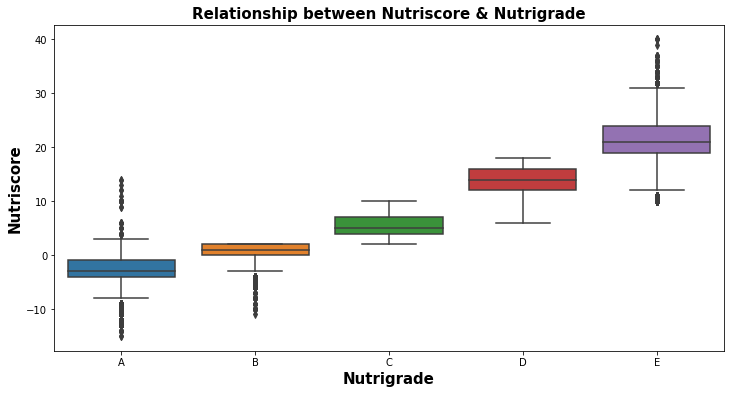

In [5]:
plt.figure(figsize=(12, 6))
rel = sns.boxplot(x='nutriscore_grade', y='nutriscore_score', data=df_data_cleaned.sort_values('nutriscore_score'))
rel.axes.set_title("Relationship between Nutriscore & Nutrigrade", fontsize=15, weight = "bold")
rel.set_xlabel("Nutrigrade",fontsize=15, weight = "bold")
rel.set_ylabel("Nutriscore",fontsize=15, weight = "bold")
rel.tick_params(labelsize=10)
plt.show()

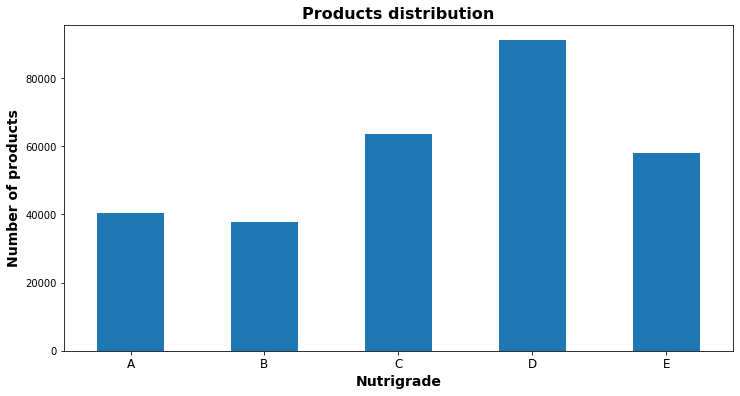

In [6]:
plt.figure(figsize=(12,6))
res1 = df_data_cleaned['nutriscore_grade'].value_counts().sort_index().plot(kind='bar')
plt.title('Products distribution', fontsize = 16, weight = 'bold')
plt.xlabel ('Nutrigrade', fontsize=14, weight = 'bold')
plt.ylabel ('Number of products', fontsize=14, weight = 'bold')
res1.set_xticklabels (res1.get_xmajorticklabels(), fontsize = 12, rotation = 0)
plt.show()

In [7]:
var_names = [ 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
             'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']

mult_col = df_data_cleaned[var_names]
df_nutrients = df_data_cleaned[~((mult_col > 100) | (mult_col < 0)).any(axis=1)]
df_nutrients = df_nutrients[~(df_nutrients[var_names] < 0).any(axis=1)]
df_nutrients = df_nutrients.loc[~((df_nutrients[var_names] == 0) | (df_nutrients[var_names].isnull())).all(axis=1)]
df_nutrients = df_nutrients[~((df_nutrients['saturated-fat_100g'] > df_nutrients['fat_100g']) 
                                | (df_nutrients['sodium_100g'] > df_nutrients['salt_100g']))]
df_nutrients = df_nutrients[(df_nutrients['fat_100g'] + df_nutrients['carbohydrates_100g'] + df_nutrients['proteins_100g']) <= 100]
df_nutrients = df_nutrients[(df_nutrients['energy_100g'] < 4000)]
df_nutrients = df_nutrients.drop(['Unnamed: 0'], axis=1)
round(df_nutrients.describe(), 2)

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,ecoscore_score_fr,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
count,167445.00,167445.00,167445.00,287014.00,154445.00,207183.00,265011.00,287014.00,287014.00,287014.00,287014.00,287014.00,102647.00,287014.00,287009.00,287009.00
mean,1.74,0.05,0.12,9.52,3.41,45.90,282.38,1170.70,15.51,5.93,24.74,12.36,2.90,9.16,1.04,0.42
std,2.38,0.22,0.42,8.76,0.95,26.21,190.90,790.85,18.66,8.53,26.51,18.38,4.41,9.08,2.34,0.94
min,0.00,0.00,0.00,-15.00,1.00,-23.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,2.00,3.00,27.00,122.00,502.00,1.50,0.40,2.00,0.60,0.31,2.10,0.09,0.04
50%,1.00,0.00,0.00,10.00,4.00,41.00,261.00,1078.00,9.20,2.40,12.00,3.10,1.70,6.60,0.60,0.24
75%,3.00,0.00,0.00,16.00,4.00,67.00,404.00,1682.00,24.00,8.90,49.00,16.00,3.60,13.90,1.30,0.52
max,30.00,2.00,5.00,40.00,4.00,124.00,2733.00,3996.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,40.00


In [8]:
var_names = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
             'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g'] 

# Select multiple columns of dataframe by names in list

df_nutri = df_nutrients[var_names]
df_nutri

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,936.0,8.2,2.2,29.0,22.0,0.0,5.1,4.60,1.840
1,134.0,0.3,0.1,5.3,3.9,NaN,0.9,0.42,0.168
2,1594.0,22.0,15.5,27.3,21.9,4.4,4.6,0.10,0.040
3,657.0,0.0,0.0,36.0,27.0,3.6,0.6,0.00,0.000
4,598.0,12.7,1.0,3.9,1.0,NaN,1.9,0.27,0.108
...,...,...,...,...,...,...,...,...,...
290706,628.0,6.1,4.3,21.0,14.0,NaN,2.9,0.08,0.032
290707,1448.0,27.0,17.0,19.0,18.0,NaN,6.0,0.19,0.076
290708,1469.0,0.5,0.0,80.0,0.0,NaN,7.0,0.00,0.000
290709,1393.0,20.2,6.0,30.9,10.4,NaN,7.4,1.10,0.440


In [9]:
available_data = df_nutri.notnull().sum() * 100 / len(df_nutri)
available_data_df = pd.DataFrame({'Column label': df_nutri.columns,
                                 'Existing data pct': available_data})
available_data_df.reset_index(drop=True, inplace=True)
available_data_df.sort_values('Existing data pct', ascending=False, inplace=True)
available_data_df.index = np.arange(1, len(available_data_df)+1)
available_data_df['Existing data pct'] = available_data_df['Existing data pct'].astype(float, errors = 'raise')
round(available_data_df, 2)

,Column label,Existing data pct
1,energy_100g,100.00
2,fat_100g,100.00
3,saturated-fat_100g,100.00
4,carbohydrates_100g,100.00
5,sugars_100g,100.00
6,proteins_100g,100.00
7,salt_100g,100.00
8,sodium_100g,100.00
9,fiber_100g,35.76


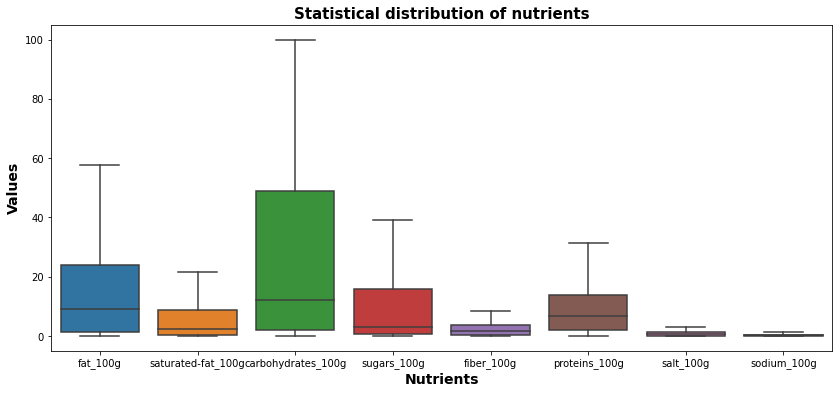

In [10]:
fig = plt.figure(figsize=(14,6))
ax = sns.boxplot(data=df_nutri.loc[:, df_nutri.columns != 'energy_100g'], showfliers = False)
ax.axes.set_title("Statistical distribution of nutrients", fontsize=15, weight = "bold")
ax.set_xlabel("Nutrients", fontsize=14, weight = "bold")
ax.set_ylabel("Values", fontsize=14, weight = "bold")
ax.tick_params(labelsize=10)
plt.show()

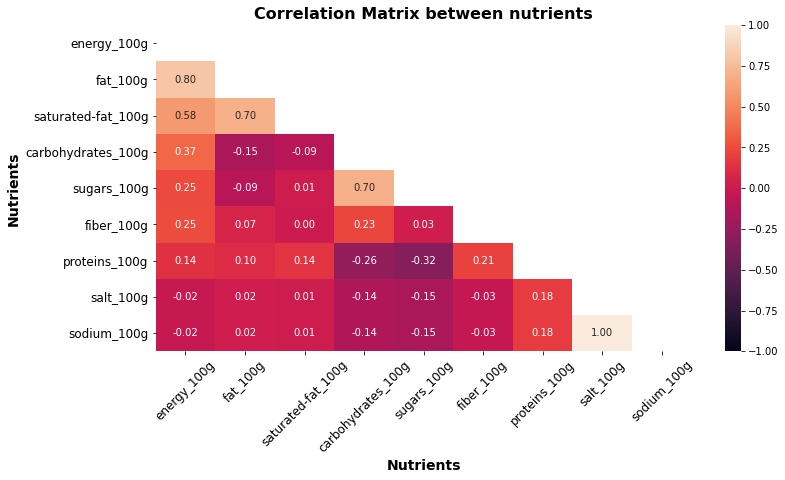

In [11]:
correlation_mat = df_nutri.corr()

plt.figure(figsize=(12,6))
tricor = np.triu(correlation_mat)
res = sns.heatmap(correlation_mat, vmin=-1, vmax=1, center= None, annot = True, fmt='.2f', annot_kws={"size": 10}, mask=tricor)
plt.title('Correlation Matrix between nutrients', fontsize = 16, weight = 'bold')
plt.xlabel ('Nutrients', fontsize=14, weight = 'bold')
plt.ylabel ('Nutrients', fontsize=14, weight = 'bold')
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 12, rotation=45)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12, rotation=0)

plt.show()

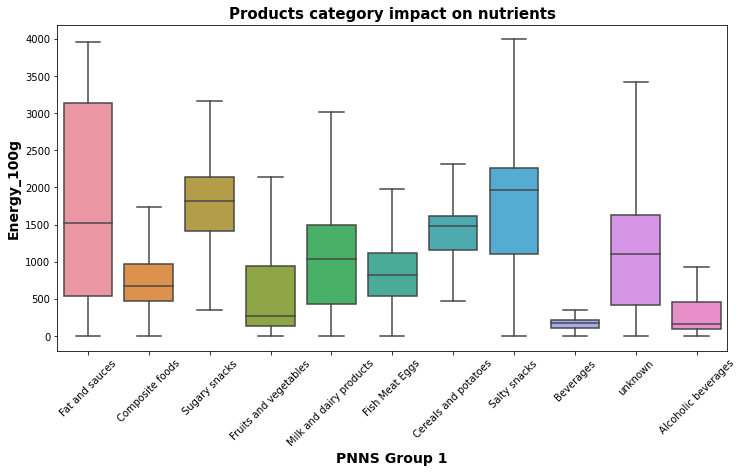

In [12]:
fig = plt.figure(figsize=(12,6))
ax = sns.boxplot(data=df_nutrients, x='pnns_groups_1', y='energy_100g', showfliers = False)
ax.axes.set_title("Products category impact on nutrients", fontsize=15, weight = "bold")
ax.set_xlabel("PNNS Group 1",fontsize=14, weight = "bold")
ax.set_ylabel("Energy_100g",fontsize=14, weight = "bold")
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 14, rotation=45)
ax.tick_params(labelsize=10)
plt.show()

<Figure size 432x288 with 0 Axes>

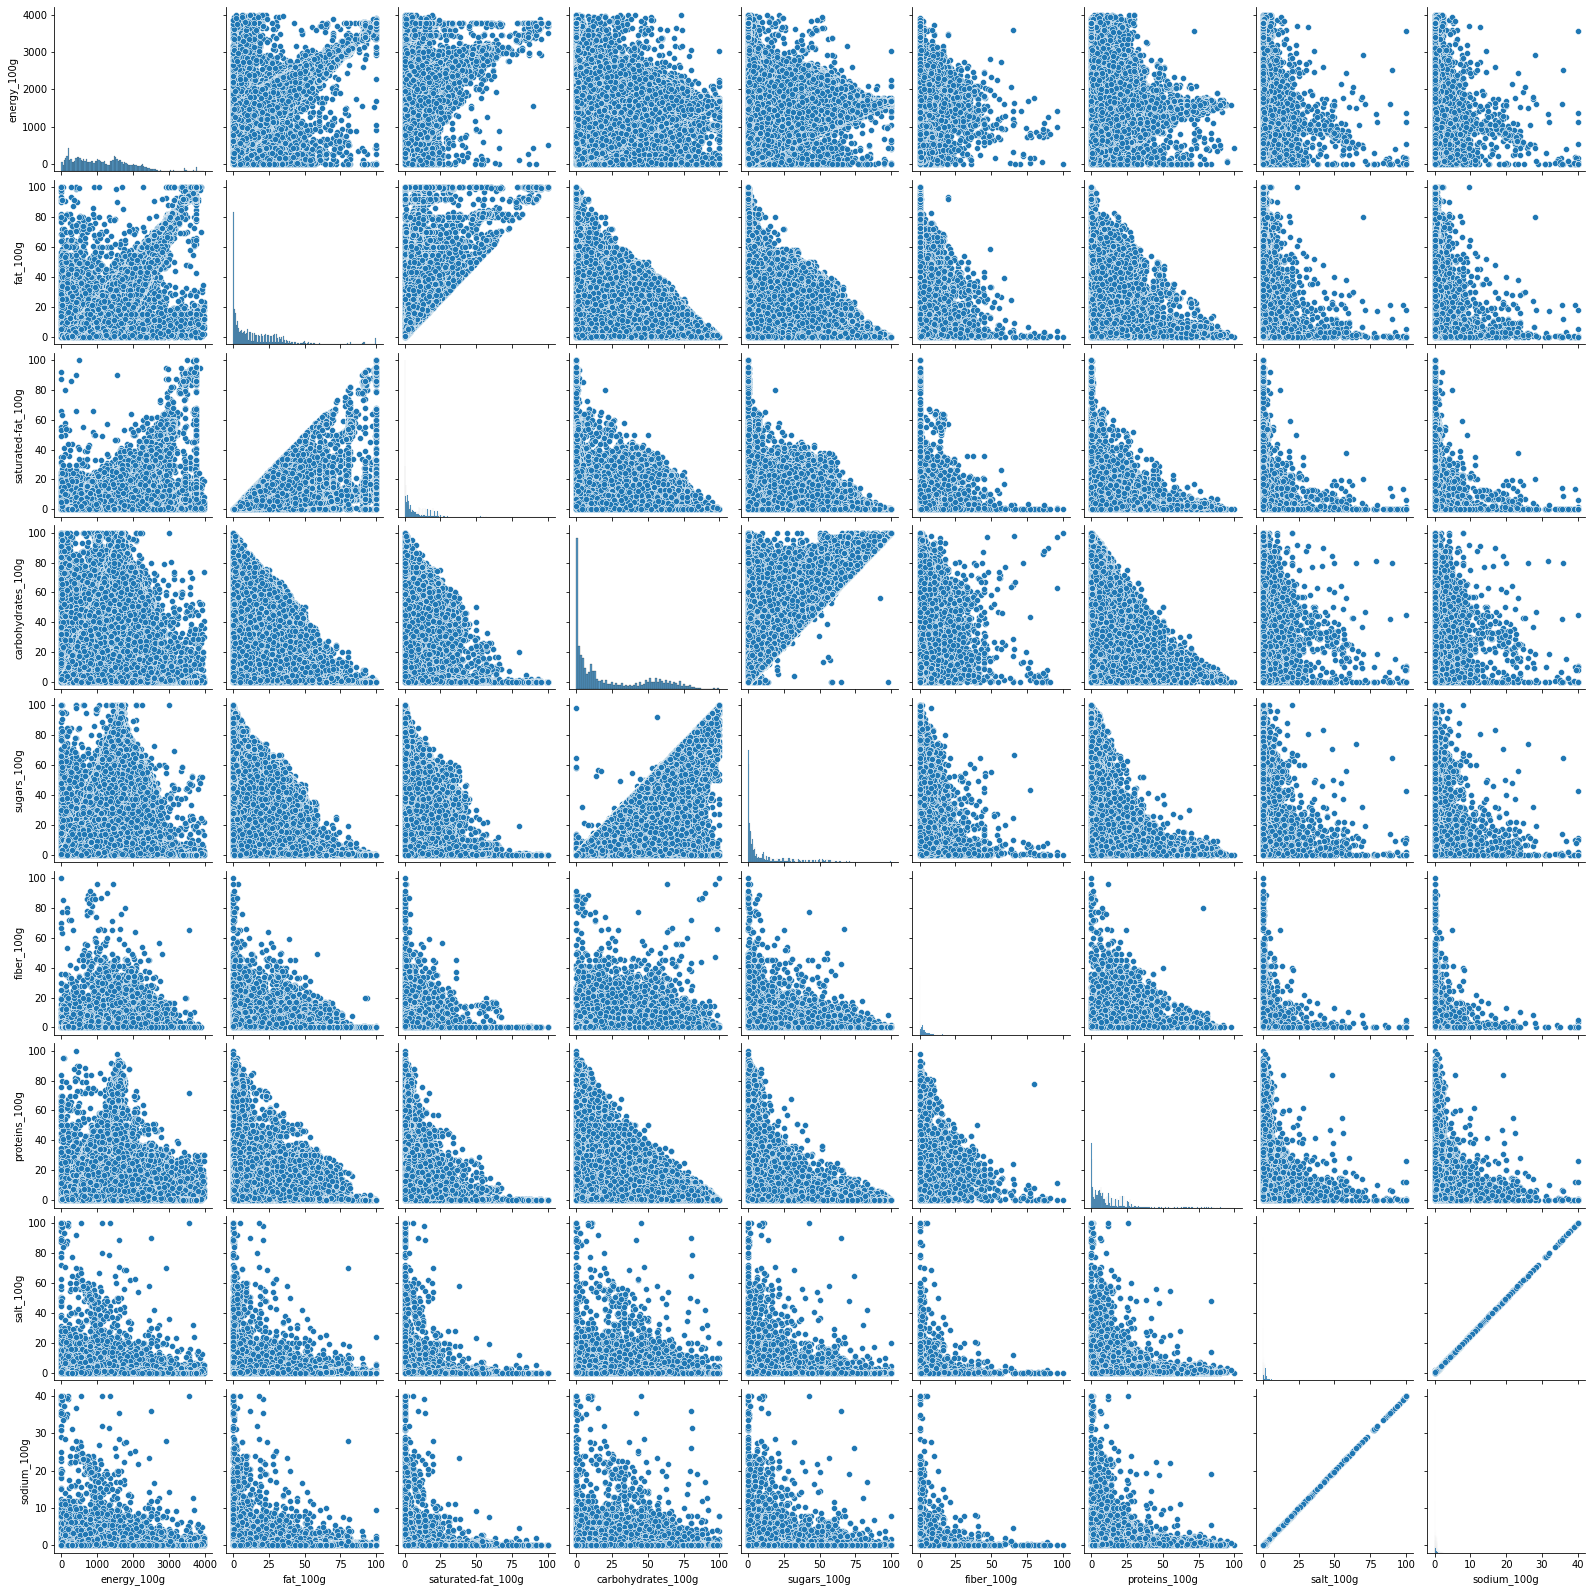

In [13]:
plt.figure()
sns.pairplot(df_nutrients, vars=var_names)
plt.show()

In [14]:
anova_table = smf.ols('nutriscore_score~pnns_groups_1', data=df_nutrients).fit()
print(anova_table.summary())

                            OLS Regression Results                            
Dep. Variable:       nutriscore_score   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                 1.459e+04
Date:                Tue, 20 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:18:43   Log-Likelihood:            -9.7128e+05
No. Observations:              287014   AIC:                         1.943e+06
Df Residuals:                  287003   BIC:                         1.943e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [15]:
sm.stats.anova_lm(anova_table, typ=2)

,sum_sq,df,F,PR(>F)
pnns_groups_1,7.428711e+06,10.0,14587.850063,0.0
Residual,1.461533e+07,287003.0,NaN,NaN


__PCA attempt__

In [16]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

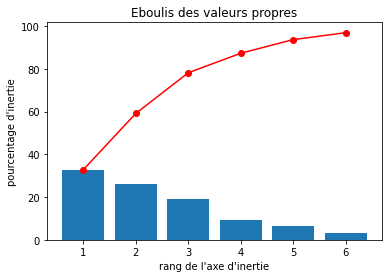

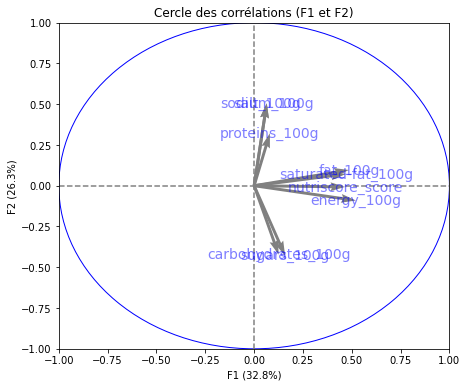

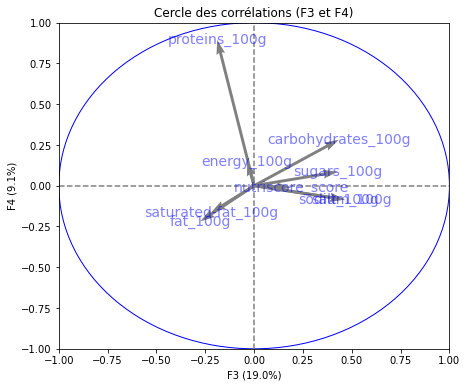

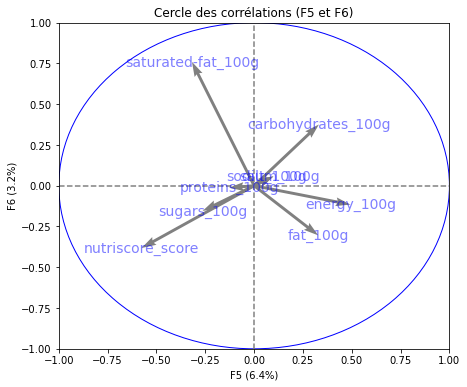

IndexError: index 9 is out of bounds for axis 0 with size 9

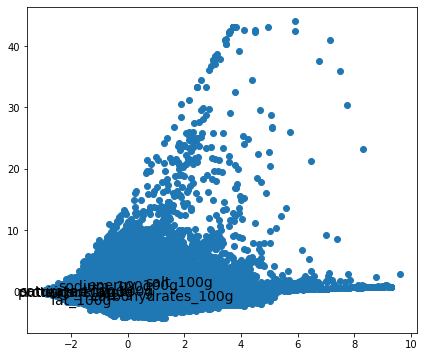

In [19]:
from sklearn import decomposition
from sklearn import preprocessing
#from functions import *

# choix du nombre de composantes à calculer
n_comp = 6

# import de l'échantillon
#df_nutrient

# selection des colonnes à prendre en compte dans l'ACP
data_pca = df_nutrients[["energy_100g","proteins_100g","carbohydrates_100g","fat_100g",
                         "saturated-fat_100g","salt_100g","sodium_100g","sugars_100g",
                          "nutriscore_score"]]

# préparation des données pour l'ACP
#data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
data_pca = data_pca.dropna()
X = data_pca.values
#names = data["idCours"] # ou data.index pour avoir les intitulés
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], var=data_pca[['nutrition_grade']].values[:,0],
                         illustrative_legend='nutrition scoring')

plt.show()